In [27]:
#conda install -c conda-forge statsmodels matplotlib
#pip install statsmodels matplotlib

In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
data = pd.read_csv("../data/ice_cream_sales.csv")

In [30]:
data.head()

,temp,weekday,cost,price,sales
0,17.3,6,1.5,5.6,173
1,25.4,3,0.3,4.9,196
2,23.3,5,1.5,7.6,207
3,26.9,1,0.3,5.3,241
4,20.2,1,1.0,7.2,227


In [31]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     10000 non-null  float64
 1   weekday  10000 non-null  int64  
 2   cost     10000 non-null  float64
 3   price    10000 non-null  float64
 4   sales    10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [32]:
data.describe()

,temp,weekday,cost,price,sales
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.014230,3.982400,0.818600,6.129420,200.503300
std,3.972403,2.017696,0.461384,1.193519,19.422964
min,10.100000,1.000000,0.300000,1.900000,140.000000
25%,21.300000,2.000000,0.500000,5.300000,187.000000
50%,24.000000,4.000000,0.500000,6.100000,197.000000
75%,26.700000,6.000000,1.000000,6.900000,213.000000
max,37.400000,7.000000,1.500000,10.600000,258.000000


In [33]:
data_train, data_test = train_test_split(data,train_size=0.8) 

In [34]:
m0 = smf.ols('sales ~ temp', data=data_train).fit()

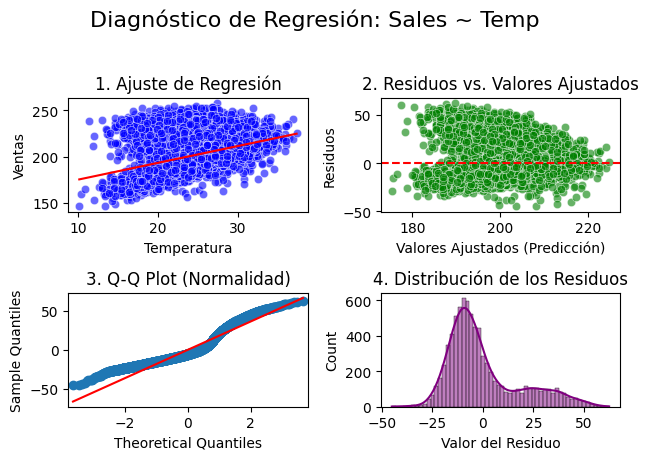

In [35]:
# 3. Gráficos de Diagnóstico
fig, axs = plt.subplots(2, 2)
fig.suptitle('Diagnóstico de Regresión: Sales ~ Temp', fontsize=16)

# --- A. Gráfico de Regresión (Datos + Línea de Ajuste) ---
sns.scatterplot(x=data_train['temp'], y=data['sales'], ax=axs[0, 0], color='blue', alpha=0.6)
sns.lineplot(x=data_train['temp'], y=m0.fittedvalues, ax=axs[0, 0], color='red')
axs[0, 0].set_title('1. Ajuste de Regresión')
axs[0, 0].set_xlabel('Temperatura')
axs[0, 0].set_ylabel('Ventas')

# --- B. Residuos vs. Valores Ajustados (Homocedasticidad) ---
residuals = m0.resid
fitted_vals = m0.fittedvalues
sns.scatterplot(x=fitted_vals, y=residuals, ax=axs[0, 1], color='green', alpha=0.6)
axs[0, 1].axhline(0, color='red', linestyle='--')
axs[0, 1].set_title('2. Residuos vs. Valores Ajustados')
axs[0, 1].set_xlabel('Valores Ajustados (Predicción)')
axs[0, 1].set_ylabel('Residuos')

# --- C. Q-Q Plot (Normalidad de los residuos) ---
qqplot(residuals, line='s', ax=axs[1, 0])
axs[1, 0].set_title('3. Q-Q Plot (Normalidad)')

# --- D. Histograma de Residuos (Distribución de errores) ---
sns.histplot(residuals, kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('4. Distribución de los Residuos')
axs[1, 1].set_xlabel('Valor del Residuo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
m0.predict(data_test)

1610    199.199686
1132    199.742730
6049    196.846498
8741    203.000990
896     184.356501
           ...    
18      207.345337
5077    202.638961
4226    195.760412
6106    215.490987
7757    198.656643
Length: 2000, dtype: float64

In [37]:
data_test["sales"]

1610    202
1132    204
6049    189
8741    202
896     164
       ... 
18      202
5077    197
4226    179
6106    231
7757    213
Name: sales, Length: 2000, dtype: int64

In [38]:
print(
    "mean_squared_error - test: ", mean_squared_error(m0.predict(data_test), data_test["sales"])
)

print(
    "r2_score - test: ", r2_score(m0.predict(data_test), data_test["sales"])
)

mean_squared_error - test:  319.1375456305301
r2_score - test:  -5.181123308551825


In [39]:
m1 = smf.ols(
    'sales ~ temp + weekday + cost + price',
    data=data_train
    ).fit()

In [40]:
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,147.8242,1.655,89.342,0.000,144.581,151.068
temp,1.8159,0.050,35.980,0.000,1.717,1.915
weekday,0.1424,0.099,1.432,0.152,-0.053,0.337
cost,-2.4803,0.473,-5.245,0.000,-3.407,-1.553
price,1.7172,0.182,9.423,0.000,1.360,2.074


In [41]:
m1.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.147
Model:,OLS,Adj. R-squared:,0.147
Method:,Least Squares,F-statistic:,345.1
Date:,"Fri, 23 Jan 2026",Prob (F-statistic):,1.70e-274
Time:,17:21:25,Log-Likelihood:,-34441.
No. Observations:,8000,AIC:,6.889e+04
Df Residuals:,7995,BIC:,6.893e+04
Df Model:,4,,
Covariance Type:,nonrobust,,


In [42]:
print(
    "mean_squared_error - test: ", mean_squared_error(m1.predict(data_test), data_test["sales"])
)

print(
    "r2_score - test: ", r2_score(m1.predict(data_test), data_test["sales"])
)

mean_squared_error - test:  318.1744949986917
r2_score - test:  -4.652352697524549


In [43]:
m2 = smf.ols(
    'sales ~ temp + weekday + cost',
    data=data_train
    ).fit()

In [44]:
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,157.0177,1.344,116.856,0.000,154.384,159.652
temp,1.8110,0.051,35.689,0.000,1.711,1.910
weekday,0.1496,0.100,1.496,0.135,-0.046,0.346
cost,-0.7454,0.438,-1.702,0.089,-1.604,0.113


In [45]:
m2.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.138
Model:,OLS,Adj. R-squared:,0.137
Method:,Least Squares,F-statistic:,425.9
Date:,"Fri, 23 Jan 2026",Prob (F-statistic):,1.06e-256
Time:,17:21:25,Log-Likelihood:,-34486.
No. Observations:,8000,AIC:,6.898e+04
Df Residuals:,7996,BIC:,6.901e+04
Df Model:,3,,
Covariance Type:,nonrobust,,


In [46]:
m2.summary().tables[2]

Omnibus:,1088.443,Durbin-Watson:,2.027
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1582.279
Skew:,1.069,Prob(JB):,0.00
Kurtosis:,3.415,Cond. No.,165.


In [47]:
m3 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=data_train).fit()
m3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,201.6578,1.119,180.213,0.000,199.464,203.851
C(weekday)[T.2],-33.9786,0.468,-72.529,0.000,-34.897,-33.060
C(weekday)[T.3],-33.8212,0.478,-70.766,0.000,-34.758,-32.884
C(weekday)[T.4],-33.7758,0.479,-70.472,0.000,-34.715,-32.836
C(weekday)[T.5],-33.6725,0.474,-71.108,0.000,-34.601,-32.744
C(weekday)[T.6],-33.7401,0.483,-69.845,0.000,-34.687,-32.793
C(weekday)[T.7],0.1910,0.456,0.419,0.675,-0.703,1.085
price,-3.9094,0.123,-31.910,0.000,-4.150,-3.669
temp,1.8343,0.031,58.992,0.000,1.773,1.895
cost,3.1932,0.295,10.807,0.000,2.614,3.772


In [48]:
m3.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.677
Model:,OLS,Adj. R-squared:,0.677
Method:,Least Squares,F-statistic:,1860.
Date:,"Fri, 23 Jan 2026",Prob (F-statistic):,0.00
Time:,17:21:25,Log-Likelihood:,-30559.
No. Observations:,8000,AIC:,6.114e+04
Df Residuals:,7990,BIC:,6.121e+04
Df Model:,9,,
Covariance Type:,nonrobust,,


In [54]:
print(
    "mean_squared_error - test: ", mean_squared_error(m4.predict(data_test), data_test["sales"])
)

print(
    "r2_score - test: ", r2_score(m4.predict(data_test), data_test["sales"])
)

mean_squared_error - test:  72.50453576358831
r2_score - test:  0.7722742595381284


In [55]:
m4 = smf.ols(
    "sales ~ price*cost + price*C(weekday) + price*temp",
    data=data_train
).fit()

In [56]:
m4.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.808
Model:,OLS,Adj. R-squared:,0.807
Method:,Least Squares,F-statistic:,1971.
Date:,"Fri, 23 Jan 2026",Prob (F-statistic):,0.00
Time:,17:21:40,Log-Likelihood:,-28485.
No. Observations:,8000,AIC:,5.701e+04
Df Residuals:,7982,BIC:,5.713e+04
Df Model:,17,,
Covariance Type:,nonrobust,,


In [57]:
m4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,198.2167,3.545,55.908,0.000,191.267,205.167
C(weekday)[T.2],-118.0134,2.034,-58.033,0.000,-122.000,-114.027
C(weekday)[T.3],-120.0308,2.094,-57.333,0.000,-124.135,-115.927
C(weekday)[T.4],-118.0955,2.087,-56.578,0.000,-122.187,-114.004
C(weekday)[T.5],-118.6819,2.088,-56.852,0.000,-122.774,-114.590
C(weekday)[T.6],-119.4040,2.096,-56.977,0.000,-123.512,-115.296
C(weekday)[T.7],1.3831,2.189,0.632,0.528,-2.908,5.675
price,-2.3654,0.561,-4.219,0.000,-3.464,-1.266
price:C(weekday)[T.2],12.8717,0.315,40.861,0.000,12.254,13.489
price:C(weekday)[T.3],13.2217,0.326,40.586,0.000,12.583,13.860


In [58]:
m4.summary().tables[2]

Omnibus:,144.108,Durbin-Watson:,2.032
Prob(Omnibus):,0.000,Jarque-Bera (JB):,255.061
Skew:,0.134,Prob(JB):,4.11e-56
Kurtosis:,3.833,Cond. No.,7.52e+03


In [59]:
print(
    "mean_squared_error - test: ", mean_squared_error(m4.predict(data_test), data_test["sales"])
)

print(
    "r2_score - test: ", r2_score(m4.predict(data_test), data_test["sales"])
)

mean_squared_error - test:  72.50453576358831
r2_score - test:  0.7722742595381284


In [53]:
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 23 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:21:26   Log-Likelihood:                -28485.
No. Observations:                8000   AIC:                         5.701e+04
Df Residuals:                    7982   BIC:                         5.713e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               198.21